In [171]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import pandas as pd

In [172]:
# Define transformations to apply to the data
transform = transforms.ToTensor()

# Load the CIFAR dataset
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [173]:
torch.manual_seed(4)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [174]:
class CifarModel(nn.Module):
  def __init__(self, input, hidden_layer1, hidden_layer2, output):
        super(CifarModel, self).__init__()
        self.fc1 = nn.Linear(input, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output)

  def forward(self, x):
      x = torch.relu(self.fc1(x))
      x = torch.relu(self.fc2(x))
      x = torch.relu(self.out(x))
      return x

In [175]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
from IPython.display import display

cifarModel = CifarModel(3072, 512, 256, 10).to(torch.device('cuda'))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(cifarModel.parameters(), lr=0.01, momentum=0.9)

losses = []
accuracies = []
precisions_micro = []
recalls_micro = []
f1_scores_micro = []
precisions_macro = []
recalls_macro = []
f1_scores_macro = []
precisions_weighted = []
recalls_weighted = []
f1_scores_weighted = []

for i in range(100):
  curr_loss = 0.0
  y_true = []
  y_pred = []

  for j, data in enumerate(train_loader):
    input, output = data[0].to(torch.device('cuda')), data[1].to(torch.device('cuda'))
    input = input.reshape(50, -1)

    optimizer.zero_grad()

    pred_out = cifarModel.forward(input)
    loss = criterion(pred_out, output)

    loss.backward()
    optimizer.step()

    curr_loss += loss.item()
    y_true += output.tolist()
    y_pred += torch.argmax(pred_out, dim=1).tolist()

  loss_avg = curr_loss / len(train_loader)
  losses.append(loss_avg)

  acc = accuracy_score(y_true, y_pred)
  accuracies.append(acc*100)

  precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro', zero_division=1)
  precisions_micro.append(precision_micro)
  recalls_micro.append(recall_micro)
  f1_scores_micro.append(f1_micro)

  precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=1)
  precisions_macro.append(precision_macro)
  recalls_macro.append(recall_macro)
  f1_scores_macro.append(f1_macro)

  precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)
  precisions_weighted.append(precision_weighted)
  recalls_weighted.append(recall_weighted)
  f1_scores_weighted.append(f1_weighted)
  print(f'epoch: {i:2}  loss: {loss_avg}')



perf_metrics = {
    'loss': losses,
    'accuracy': accuracies,
    'precision_micro': precisions_micro,
    'recall_micro': recalls_micro,
    'f1_micro': f1_scores_micro,
    'precision_macro': precisions_macro,
    'recall_macro': recalls_macro,
    'f1_macro': f1_scores_macro,
    'precision_weighted': precisions_weighted,
    'recall_weighted': recalls_weighted,
    'f1_weighted': f1_scores_weighted
}

perf_metrics_df = pd.DataFrame(perf_metrics)
display(perf_metrics_df)



epoch:  0  loss: 1.9411037157773972
epoch:  1  loss: 1.6992553470134735
epoch:  2  loss: 1.6080958948135375
epoch:  3  loss: 1.5398295118808747
epoch:  4  loss: 1.493722913622856
epoch:  5  loss: 1.4583230097293853
epoch:  6  loss: 1.4178673183321953
epoch:  7  loss: 1.3892077880501748
epoch:  8  loss: 1.3633478891849518
epoch:  9  loss: 1.33056716889143
epoch: 10  loss: 1.3008196394443512
epoch: 11  loss: 1.2753267621994018
epoch: 12  loss: 1.250175263106823
epoch: 13  loss: 1.2276900847554206
epoch: 14  loss: 1.2028342683911324
epoch: 15  loss: 1.1838441882133484
epoch: 16  loss: 1.168102617442608
epoch: 17  loss: 1.142533313691616
epoch: 18  loss: 1.118462883591652
epoch: 19  loss: 1.103161338865757
epoch: 20  loss: 1.0836413183212281
epoch: 21  loss: 1.0599277301430703
epoch: 22  loss: 1.0458474835753442
epoch: 23  loss: 1.0222559056282043
epoch: 24  loss: 1.0101941774487495
epoch: 25  loss: 0.9924643750190735
epoch: 26  loss: 0.9693678372502327
epoch: 27  loss: 0.961532564342022
e

,loss,accuracy,precision_micro,recall_micro,f1_micro,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted
0,1.941104,30.104,0.30104,0.30104,0.30104,0.292993,0.30104,0.286962,0.292993,0.30104,0.286962
1,1.699255,39.086,0.39086,0.39086,0.39086,0.384948,0.39086,0.385329,0.384948,0.39086,0.385329
2,1.608096,42.594,0.42594,0.42594,0.42594,0.419975,0.42594,0.420458,0.419975,0.42594,0.420458
3,1.539830,44.850,0.44850,0.44850,0.44850,0.442604,0.44850,0.443234,0.442604,0.44850,0.443234
4,1.493723,46.586,0.46586,0.46586,0.46586,0.460454,0.46586,0.460781,0.460454,0.46586,0.460781
...,...,...,...,...,...,...,...,...,...,...,...
95,0.370478,87.094,0.87094,0.87094,0.87094,0.871006,0.87094,0.870941,0.871006,0.87094,0.870941
96,0.317067,89.016,0.89016,0.89016,0.89016,0.890223,0.89016,0.890171,0.890223,0.89016,0.890171
97,0.353147,87.662,0.87662,0.87662,0.87662,0.876674,0.87662,0.876628,0.876674,0.87662,0.876628
98,0.362306,87.410,0.87410,0.87410,0.87410,0.874189,0.87410,0.874126,0.874189,0.87410,0.874126


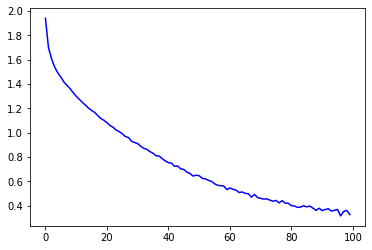

In [179]:
plt.plot(range(100), losses, 'b')

In [176]:
correct = 0
total = 0

target_out = []
pred_out = []
with torch.no_grad():
    for (i, data) in enumerate(test_loader):
        images, labels = data[0].to(torch.device('cuda')), data[1].to(torch.device('cuda'))
        # Predict the class of the image
        images = images.reshape(100, -1)
        outputs = cifarModel.forward(images)
        _, predicted = torch.max(outputs.data, 1)

        pred_out += predicted.tolist()
        target_out += labels.tolist()


loss_avg = curr_loss / len(train_loader)

acc = accuracy_score(y_true, y_pred)

precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro')


precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')


precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')


perf_metrics = {
    'loss': [loss_avg],
    'accuracy': [acc*100],
    'precision_micro': [precision_micro*100],
    'recall_micro': [recall_micro*100],
    'f1_micro': [f1_micro*100],
    'precision_macro': [precision_macro*100],
    'recall_macro': [recall_macro*100],
    'f1_macro': [f1_macro*100],
    'precision_weighted': [precision_weighted*100],
    'recall_weighted': [recall_weighted*100],
    'f1_weighted': [f1_weighted*100]
}

perf_metrics_df = pd.DataFrame(perf_metrics)
display(perf_metrics_df)


,loss,accuracy,precision_micro,recall_micro,f1_micro,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted
0,0.328129,88.55,88.55,88.55,88.55,88.561514,88.55,88.55355,88.561514,88.55,88.55355
